In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

MAIN_PATH = 'C:\data/'
df = pd.read_csv(MAIN_PATH +'uci-bank-full-1.csv')
original_df = df.copy()
term_deposits = df.copy()
# Have a grasp of how our data looks.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [43]:
df_job = pd.get_dummies(df['job'])

In [44]:
df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 12 columns):
admin.           45211 non-null uint8
blue-collar      45211 non-null uint8
entrepreneur     45211 non-null uint8
housemaid        45211 non-null uint8
management       45211 non-null uint8
retired          45211 non-null uint8
self-employed    45211 non-null uint8
services         45211 non-null uint8
student          45211 non-null uint8
technician       45211 non-null uint8
unemployed       45211 non-null uint8
unknown          45211 non-null uint8
dtypes: uint8(12)
memory usage: 529.9 KB


In [45]:
df_job.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
df_job.drop(labels=['unknown'], axis=1,inplace = True)

In [47]:
df_job.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [48]:
df_education = pd.get_dummies(df['education'])

In [49]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
primary      45211 non-null uint8
secondary    45211 non-null uint8
tertiary     45211 non-null uint8
unknown      45211 non-null uint8
dtypes: uint8(4)
memory usage: 176.7 KB


In [50]:
df_education.drop(labels=['unknown'], axis=1,inplace = True)

In [51]:
df_education.head()

,primary,secondary,tertiary
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,0
4,0,0,0


In [52]:
df_convert = pd.concat([df, df_job, df_education], axis=1)

In [53]:
df_convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 31 columns):
age              45211 non-null int64
job              45211 non-null object
marital          45211 non-null object
education        45211 non-null object
default          45211 non-null object
balance          45211 non-null int64
housing          45211 non-null object
loan             45211 non-null object
contact          45211 non-null object
day              45211 non-null int64
month            45211 non-null object
duration         45211 non-null int64
campaign         45211 non-null int64
pdays            45211 non-null int64
previous         45211 non-null int64
poutcome         45211 non-null object
deposit          45211 non-null object
admin.           45211 non-null uint8
blue-collar      45211 non-null uint8
entrepreneur     45211 non-null uint8
housemaid        45211 non-null uint8
management       45211 non-null uint8
retired          45211 non-null uint8
self-em

In [54]:
df_convert.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,management,retired,self-employed,services,student,technician,unemployed,primary,secondary,tertiary
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,0,0,0,0,0,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,1,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# deposit, house, loan, default 의 yes, no를 binary 0,1 값으로 변경
def convert_to_int(df, new_column, target_column):
    df[new_column] = df[target_column].apply(lambda x: 0 if x == 'no' else 1)
    return df[new_column].value_counts()

In [56]:
convert_to_int(df_convert, "deposit_int", "deposit") #Create a deposit int
convert_to_int(df_convert, "housing_int", "housing") # Create housingint column
convert_to_int(df_convert, "loan_int", "loan") #Create a loan_int column
convert_to_int(df_convert, "default_int", "default") #Create a default_int column

0    44396
1      815
Name: default_int, dtype: int64

In [57]:
def convert_marital_to_int(df, new_column, target_column):
    df[new_column] = df[target_column].apply(lambda x: 0 if x == 'single' else 1)
    return df[new_column].value_counts()

In [58]:
convert_marital_to_int(df_convert, "marital_int", "marital")

1    32421
0    12790
Name: marital_int, dtype: int64

In [59]:
df_convert.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,technician,unemployed,primary,secondary,tertiary,deposit_int,housing_int,loan_int,default_int,marital_int
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,1,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,0,0,1,0,0,1,0,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,1,0,0,1,1,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df_convert.drop(labels=['job','marital','education','default','housing','loan','default_int','contact','poutcome','day'], axis=1,inplace = True)

In [61]:
df_convert.head()

,age,balance,day,month,duration,campaign,pdays,previous,deposit,admin.,...,student,technician,unemployed,primary,secondary,tertiary,deposit_int,housing_int,loan_int,marital_int
0,58,2143,5,may,261,1,-1,0,no,0,...,0,0,0,0,0,1,0,1,0,1
1,44,29,5,may,151,1,-1,0,no,0,...,0,1,0,0,1,0,0,1,0,0
2,33,2,5,may,76,1,-1,0,no,0,...,0,0,0,0,1,0,0,1,1,1
3,47,1506,5,may,92,1,-1,0,no,0,...,0,0,0,0,0,0,0,1,0,1
4,33,1,5,may,198,1,-1,0,no,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df_convert.drop(labels=['deposit'], axis=1,inplace = True)

In [63]:
lst = [df_convert]

# Create a column with the numeric values of the months.
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

# Change datatype from int32 to int64
df_convert["month_int"] = df_convert["month_int"].astype(np.int64)
df_convert.head()

,age,balance,day,month,duration,campaign,pdays,previous,admin.,blue-collar,...,technician,unemployed,primary,secondary,tertiary,deposit_int,housing_int,loan_int,marital_int,month_int
0,58,2143,5,may,261,1,-1,0,0,0,...,0,0,0,0,1,0,1,0,1,5
1,44,29,5,may,151,1,-1,0,0,0,...,1,0,0,1,0,0,1,0,0,5
2,33,2,5,may,76,1,-1,0,0,0,...,0,0,0,1,0,0,1,1,1,5
3,47,1506,5,may,92,1,-1,0,0,1,...,0,0,0,0,0,0,1,0,1,5
4,33,1,5,may,198,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [64]:
df_convert.drop(labels=['month'], axis=1,inplace = True)

In [65]:
df_convert.head()

,age,balance,day,duration,campaign,pdays,previous,admin.,blue-collar,entrepreneur,...,technician,unemployed,primary,secondary,tertiary,deposit_int,housing_int,loan_int,marital_int,month_int
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,5
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,5
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,1,1,1,5
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,5
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [66]:
df_convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 26 columns):
age              45211 non-null int64
balance          45211 non-null int64
day              45211 non-null int64
duration         45211 non-null int64
campaign         45211 non-null int64
pdays            45211 non-null int64
previous         45211 non-null int64
admin.           45211 non-null uint8
blue-collar      45211 non-null uint8
entrepreneur     45211 non-null uint8
housemaid        45211 non-null uint8
management       45211 non-null uint8
retired          45211 non-null uint8
self-employed    45211 non-null uint8
services         45211 non-null uint8
student          45211 non-null uint8
technician       45211 non-null uint8
unemployed       45211 non-null uint8
primary          45211 non-null uint8
secondary        45211 non-null uint8
tertiary         45211 non-null uint8
deposit_int      45211 non-null int64
housing_int      45211 non-null int64
loan_int         

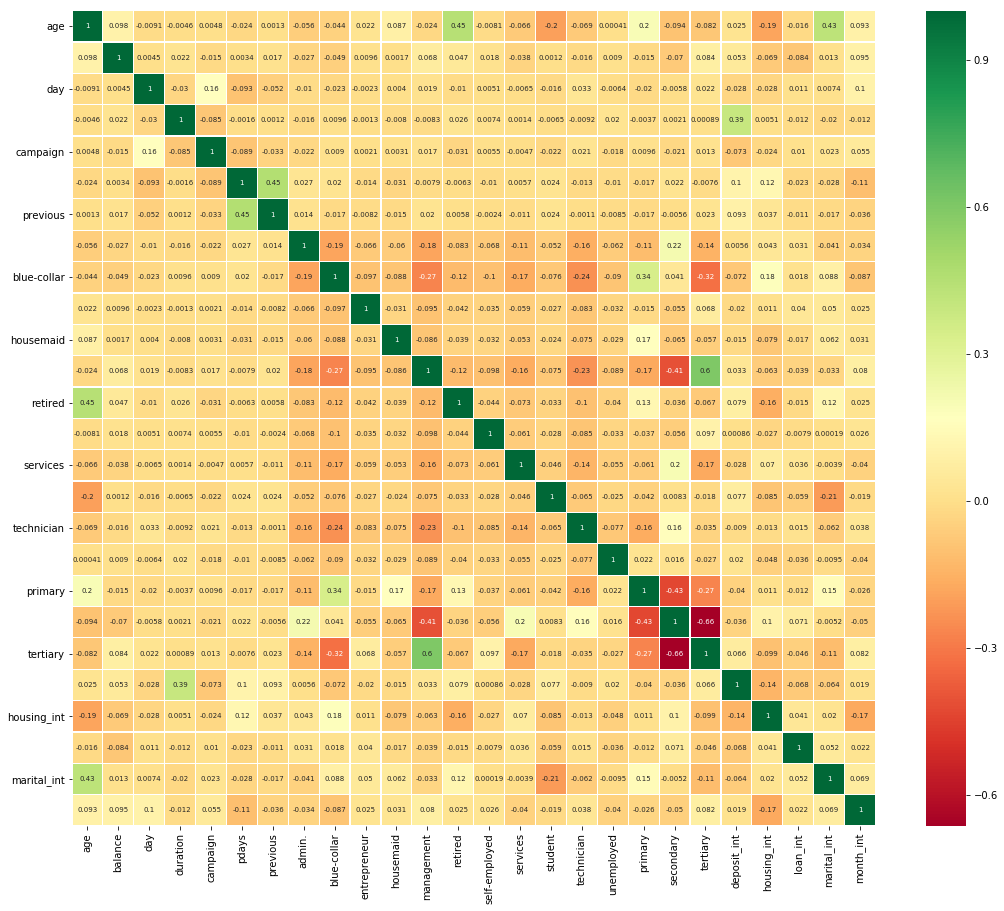

In [67]:
# 전체 변수 correlation 분석
corr = df_convert.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':7})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [68]:
df_convert.describe()

,age,balance,day,duration,campaign,pdays,previous,admin.,blue-collar,entrepreneur,...,technician,unemployed,primary,secondary,tertiary,deposit_int,housing_int,loan_int,marital_int,month_int
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.114375,0.215257,0.032890,...,0.168034,0.028820,0.151534,0.513194,0.294198,0.116985,0.555838,0.160226,0.717104,6.144655
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.318269,0.411005,0.178351,...,0.373901,0.167303,0.358572,0.499831,0.455687,0.321406,0.496878,0.366820,0.450411,2.408034
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,6.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,8.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000


In [69]:
# 특정 변수의 값이 지나치게 큰 값으로 되어, 계산에 영향을 주지 않도록 모든 변수의 범위를 -1 ~ 1 사이로 normalization 한다.
from sklearn.preprocessing import MinMaxScaler

nc = MinMaxScaler()

In [71]:
## values.reshape 은 메트릭스의 모양을 바꿔준다.
scaled_value_age = nc.fit_transform(df_convert['age'].values.reshape(-1,1))
scaled_value_balance = nc.fit_transform(df_convert['balance'].values.reshape(-1,1))
scaled_value_duration = nc.fit_transform(df_convert['duration'].values.reshape(-1,1))
scaled_value_month_int = nc.fit_transform(df_convert['month_int'].values.reshape(-1,1))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



In [72]:
df_convert['age'] = scaled_value_age
df_convert['balance'] = scaled_value_balance
df_convert['duration'] = scaled_value_duration
df_convert['month_int'] = scaled_value_month_int

In [73]:
df_convert.head()

,age,balance,duration,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,...,technician,unemployed,primary,secondary,tertiary,deposit_int,housing_int,loan_int,marital_int,month_int
0,0.519481,0.092259,0.053070,1,-1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0.363636
1,0.337662,0.073067,0.030704,1,-1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0.363636
2,0.194805,0.072822,0.015453,1,-1,0,0,0,1,0,...,0,0,0,1,0,0,1,1,1,0.363636
3,0.376623,0.086476,0.018707,1,-1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0.363636
4,0.194805,0.072812,0.040260,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.363636


In [75]:
# Classification 기준값인 deposit_class을 맨 뒤로 옮긴다.
dep = df_convert['deposit_int']
df_convert['deposit_class'] = dep
df_convert.drop(labels=['deposit_int'], axis=1,inplace = True)
df_convert.head()

,age,balance,duration,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,...,technician,unemployed,primary,secondary,tertiary,housing_int,loan_int,marital_int,month_int,deposit_class
0,0.519481,0.092259,0.053070,1,-1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0.363636,0
1,0.337662,0.073067,0.030704,1,-1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0.363636,0
2,0.194805,0.072822,0.015453,1,-1,0,0,0,1,0,...,0,0,0,1,0,1,1,1,0.363636,0
3,0.376623,0.086476,0.018707,1,-1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0.363636,0
4,0.194805,0.072812,0.040260,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.363636,0


In [77]:
from sklearn.model_selection import train_test_split
## numpy format을 iloc를 이용하여 pandas format으로 변환해줘야 한다. ','앞이 행, 그 뒤가 열
## [:,:-1] : 처음부터 맨 끝 앞까지만 가져온다   data.data 와 같은 의미
## [:,-1] : 처음ㅂ터 맨 끝 데이터까지 가져온다. data.target과 같은 의미
## random_state를 넣어주지 않으면 매번 다른 기준이 적용되므로, 42 옵션을 부여 관례적으로 부여한다.
X_train, X_test, y_train, y_test = train_test_split(df_convert.iloc[:,:-1], df_convert.iloc[:,-1], test_size=0.3, random_state=42)
from sklearn.dummy import DummyClassifier
## 별도의 알고리즘 적용하지 않았을 경우의 성능을 먼저 예측한다.
du = DummyClassifier()

In [78]:
from sklearn.model_selection import GridSearchCV
gcv = GridSearchCV(DummyClassifier(),param_grid={'strategy':['stratified','most_frequent','prior','uniform']})
gcv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DummyClassifier(constant=None, random_state=None, strategy='stratified'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'strategy': ['stratified', 'most_frequent', 'prior', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
gcv.best_params_

{'strategy': 'most_frequent'}

In [80]:
gcv.best_score_

0.88336967169083958

In [81]:
from sklearn.ensemble import RandomForestClassifier
Rforest = RandomForestClassifier(n_estimators=5, random_state=42)
par = {'n_estimators': [50, 100, 150, 10],'random_state':[100,200,300],'max_depth':[x for x in range(3,10)]}
gcv = GridSearchCV(estimator=Rforest, param_grid=par, cv=3, n_jobs=-1)

In [82]:
gcv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 150, 10], 'random_state': [100, 200, 300], 'max_depth': [3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [83]:
gcv.best_params_

{'max_depth': 9, 'n_estimators': 10, 'random_state': 200}

In [105]:
Rforest = RandomForestClassifier(n_estimators=150, random_state=100, max_depth=15)
Rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [106]:
Rforest.score(X_train, y_train)

0.96252409391095517

In [107]:
## 주요 성능 측정값을 구해보자
from sklearn.metrics import classification_report
a = classification_report(y_test,Rforest.predict(X_test),digits=7)

In [108]:
print(a)

             precision    recall  f1-score   support

          0  0.9137742 0.9768511 0.9442604     11966
          1  0.6411917 0.3097622 0.4177215      1598

avg / total  0.8816608 0.8982601 0.8822279     13564



In [109]:
Rforest.score(X_test, y_test)

0.89826010026540848

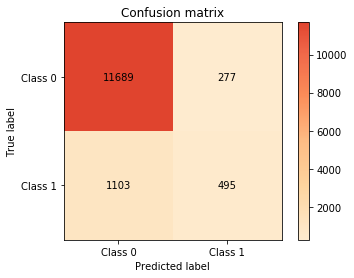

In [110]:
from sklearn.metrics import confusion_matrix
from sklearn_evaluation import plot
%matplotlib inline

plot.confusion_matrix(y_test, Rforest.predict(X_test))

In [118]:
from sklearn.metrics import classification_report, confusion_matrix,precision_recall_curve,recall_score, f1_score, cohen_kappa_score,auc, precision_score

In [121]:
from sklearn.naive_bayes import GaussianNB as nb
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import Perceptron as per
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.neighbors import KNeighborsClassifier as knn

In [119]:
# define evaluation function
def grid_search(model, param_grid) :

 grid_search = GridSearchCV(model, param_grid)
 grid_search.fit(X_train, y_train)

 print("best score : ", grid_search.best_score_)
 print("best parameter : " , grid_search.best_params_)
 print("test set score : " , grid_search.score(X_test, y_test))

 y_pred = grid_search.predict(X_test)
 print("")
 print("kappa :", cohen_kappa_score(y_test, y_pred))
 print("sensitivity :", recall_score(y_test, y_pred, average='binary'))

 grid_search.fit(X_train, y_train.values.ravel())
 y_pred_proba = grid_search.predict_proba(X_test.values)
 y_score = y_pred_proba[:,1]
 precision, recall, thresholds = precision_recall_curve(y_test,
y_score)
 print("auprc : ", auc(recall, precision, reorder=True))
 plt.figure(figsize=(2,2))
 plt.plot(recall, precision) 

best score :  0.883369671691
best parameter :  {'strategy': 'most_frequent'}
test set score :  0.88218814509

kappa : 0.0
sensitivity : 0.0
auprc :  0.558905927455


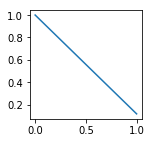

In [120]:
strategy = {'strategy':['stratified','most_frequent','prior','uniform']}
grid_search(DummyClassifier(), strategy)

best score :  0.874048093026
best parameter :  {'min_samples_split': 10}
test set score :  0.875552934238

kappa : 0.361123456804
sensitivity : 0.399249061327
auprc :  0.460261045244


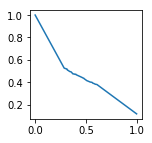

In [123]:
min_sample = {'min_samples_split' : [3, 5, 10]}
grid_search(dt(), min_sample)

best score :  0.891016526053
best parameter :  {'max_iter': 30}
test set score :  0.889044529637

kappa : 0.240850332476
sensitivity : 0.18648310388
auprc :  0.45483992272


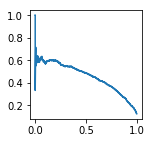

In [124]:
max_iter = {'max_iter' : [10, 30, 50]}
grid_search(lr(), max_iter)

In [126]:
per_gs = GridSearchCV(per(), param_grid= {'max_iter' : [200, 500, 1000]})
per_gs.fit(X_train, y_train)

print("best score : ", per_gs.best_score_)
print("best parameter : " , per_gs.best_params_)
print("test set score : " , per_gs.score(X_test, y_test))

y_pred = per_gs.predict(X_test)
print("")
print("kappa :", cohen_kappa_score(y_test, y_pred))
print("sensitivity :", recall_score(y_test, y_pred, average='binary'))

best score :  0.872373368724
best parameter :  {'max_iter': 200}
test set score :  0.849675611914

kappa : 0.307780016127
sensitivity : 0.413642052566


best score :  0.892027680349
best parameter :  {'activation': 'logistic', 'learning_rate_init': 0.001, 'max_iter': 2000}
test set score :  0.891551164848

kappa : 0.297543622569
sensitivity : 0.24280350438
auprc :  0.461484617183


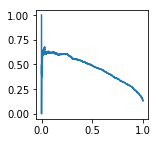

In [127]:
param = {'activation' : ['logistic', 'tanh', 'relu'], 'learning_rate_init' : [0.1, 0.01, 0.001], 'max_iter' : [1000,2000]}
grid_search(mlp(), param)